# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [141]:
import numpy as np
def f1(x):
    return np.exp(x**2) * np.log10(x)

def f2(x):
    return np.sin(x) * np.log(x)

a = 1
b = 3
N = np.array([10,100,1000,10000,100000])

In [142]:
table = pd.DataFrame(columns=["Aproximación", "Error"], index=N)
table

,Aproximación,Error
10,NaN,NaN
100,NaN,NaN
1000,NaN,NaN
10000,NaN,NaN
100000,NaN,NaN


In [143]:
def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    media = np.mean(f(u))
    return media*(b-a)

In [144]:
N

array([    10,    100,   1000,  10000, 100000])

In [151]:
for n in N:
    aproximacion_f1 = montecarlo(f1, n, a, b)
    error_f1 = abs(14.0275 - aproximacion_f1)

    aproximacion_f2 = montecarlo(f2, n, a, b)
    error_f2 = abs(0.869844 - aproximacion_f2)

In [140]:
table

,Aproximación (f1),Error (f1),Aproximación (f2),Error (f2)
10,12.208649,1.818851,0.822033,0.047811
100,12.928302,1.099198,0.834764,0.03508
1000,14.147822,0.120322,0.860478,0.009366
10000,13.953695,0.073805,0.870802,0.000958
100000,14.017149,0.010351,0.869491,0.000353


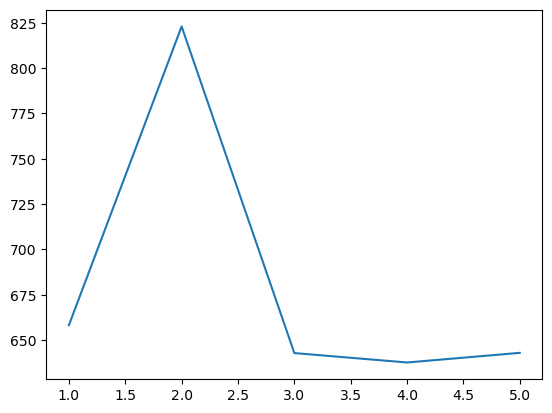

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot([1,2,3,4,5], table["Error"])


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [171]:
import sympy as sp
import numpy as np

def funcion(x, y):
    return (x**2 + 2*y**2)  <=  (-2*x + 8*y - 7)


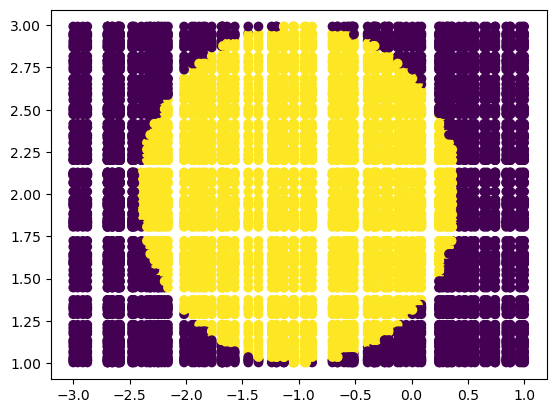

In [172]:
x = np.random.uniform(-3, 1,100)
y = np.random.uniform(1, 3, 100)

X, Y = np.meshgrid(x,y)
plt.figure()
plt.scatter(X, Y, c = funcion(X, Y))

In [175]:
def montecarlo1(region,xa, xb, ya, yb, n):
    x = np.random.uniform(xa, xb, n)
    y = np.random.uniform(ya, yb, n)
    B = region(x,y)
    AR =(xb-xa)*(yb-ya)
    return np.mean(B)*AR

n = np.logspace(1,5,5)


table2 = pd.DataFrame(columns=["Aproximación", "Error Relativo"], index = n)
table2

,Aproximación,Error Relativo
10.0,NaN,NaN
100.0,NaN,NaN
1000.0,NaN,NaN
10000.0,NaN,NaN
100000.0,NaN,NaN


In [181]:
a1 = -3
b1 = 1
a2 = 1
b2 = 3

AR = (b1-a1)*(b2-a2)
for i in n:
    funcion_aprox = montecarlo1(funcion, -3, 1, 1, 3, int(i))
    table2.loc[i, "Área aproximada"] = funcion_aprox
    Crel = ((1-funcion_aprox/AR)/(funcion_aprox/AR))**(1/2)
    er = np.log10(Crel) - np.log(i)/2
    table2.loc[i, "Error relativo"] = er
table2

,Aproximación,Error Relativo,Error relativo,Área aproximada
10.0,NaN,NaN,-0.967304,2.40000
100.0,NaN,NaN,-2.363788,4.56000
1000.0,NaN,NaN,-3.494822,4.37600
10000.0,NaN,NaN,-4.653225,4.44080
100000.0,NaN,NaN,-5.805229,4.44728


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

- Para el diseño de estructuras, en donde se necesite calcular área, volumen o longitud de un segmento estructural que pueda ser curvo o irregular. 
- Se usa en hidrología e hidraúlica para calcular el caudal máximo de ríos o canales y evitar inundaciones y drenajes ayudandose de la probabilidad.
- Para optimizar costos al hacer una estimación de estos contando mano de obra, materiales, equipos, etc. 